# Formação Cientista de Dados - Fernando Amaral e Jones Granatyr
# Deep Learning

In [1]:
# Importação das bibliotecas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import utils
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist
#pip install tensorflow (executar no Anaconda Prompt)

11490434/11490434 [==============================] - 2s 0us/step


Text(0.5, 1.0, '0')

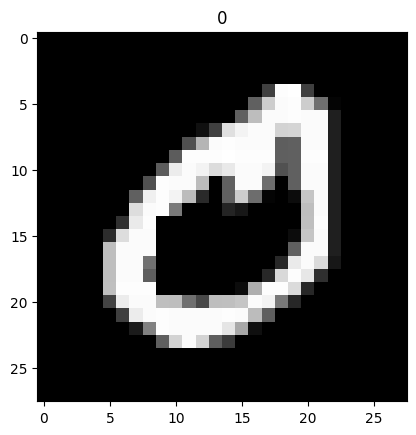

In [2]:
# Obtenção dos dados e divisão automática entre treinamento e teste
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()
# Visualização de imagens específicas
plt.imshow(X_treinamento[21], cmap = 'gray')
plt.title(y_treinamento[21])

In [3]:
# Mudança de dimensão, originalmente está em 28x28 e precisamos 784
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))
X_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [4]:
# Transformação dos dados para float para podermos normalizar os dados
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [5]:
# Normalização (255 é o valor máximo de um pixel)
X_treinamento /= 255
X_teste /= 255

In [6]:
# Transformação para o formato dummy (temos 10 classes)
y_treinamento = utils.to_categorical(y_treinamento, 10)
y_teste = utils.to_categorical(y_teste, 10)
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [7]:
# Estrutura da rede neural: 784 - 64 - 64 - 64 - 10
# Dropout é utilizado para zerar uma porcentagem dos neurônios, para evitar o overfitting
modelo = Sequential()
modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
# Camada de saida, softmax probabilidade
modelo.add(Dense(units = 10, activation = 'softmax'))

In [8]:
# Visualização da estrutura da rede neural
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                6

In [11]:
# Configuração dos parâmetros da rede neural e treinamento (utilizando base de dados de validação)
# Na variável historico temos os histórico das execuções (erro e accuracy)
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(X_treinamento, y_treinamento, epochs = 100,
                       validation_data = (X_teste, y_teste))

Epoch 1/100
1875/1875 [==============================] - 16s 7ms/step - loss: 0.0491 - accuracy: 0.9859 - val_loss: 0.1237 - val_accuracy: 0.9758
Epoch 2/100
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0503 - accuracy: 0.9849 - val_loss: 0.1209 - val_accuracy: 0.9754
Epoch 3/100
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0494 - accuracy: 0.9851 - val_loss: 0.1240 - val_accuracy: 0.9770
Epoch 4/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0520 - accuracy: 0.9848 - val_loss: 0.1139 - val_accuracy: 0.9761
Epoch 5/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0481 - accuracy: 0.9856 - val_loss: 0.1207 - val_accuracy: 0.9754
Epoch 6/100
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0460 - accuracy: 0.9859 - val_loss: 0.1211 - val_accuracy: 0.9758
Epoch 7/100
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0488 - accuracy: 0.9850 - val_loss: 0.1237 -

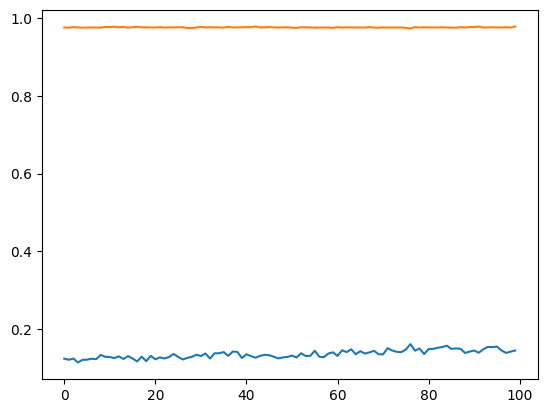

In [12]:
# Gráfico para visualizar os erros e accuracy
historico.history.keys()
#evolução do erro, azul
plt.plot(historico.history['val_loss'])
#performance da rede
plt.plot(historico.history['val_accuracy'])

In [13]:
# Obtenção das previsões 
previsoes = modelo.predict(X_teste)
previsoes

313/313 [==============================] - 2s 5ms/step


array([[2.90974057e-26, 1.05650009e-16, 4.89246881e-13, ...,
        1.00000000e+00, 1.07235681e-22, 1.18905821e-13],
       [2.95136348e-16, 1.97431476e-08, 1.00000000e+00, ...,
        1.72409483e-12, 1.02709835e-14, 2.11777921e-19],
       [8.67981670e-28, 1.00000000e+00, 8.93231344e-13, ...,
        1.91060411e-14, 6.12181084e-10, 1.80617554e-18],
       ...,
       [1.13141842e-19, 2.02046907e-10, 9.19953613e-10, ...,
        8.15531365e-10, 3.80726565e-13, 2.83070865e-08],
       [0.00000000e+00, 1.48993082e-33, 2.12859442e-24, ...,
        6.36342253e-31, 3.70030395e-29, 2.68320151e-23],
       [9.75370426e-26, 5.93148713e-27, 6.58613239e-18, ...,
        1.39823948e-35, 4.44304487e-24, 2.69091241e-36]], dtype=float32)

In [14]:
# Valor máximo (com a probabilidade maior por serem 10 saídas) e geração da matriz de confusão
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

array([[ 970,    1,    1,    1,    0,    0,    3,    1,    2,    1],
       [   0, 1127,    0,    0,    0,    1,    2,    0,    5,    0],
       [   1,    1, 1016,    2,    2,    0,    0,    6,    3,    1],
       [   0,    0,    3,  985,    0,   13,    0,    5,    2,    2],
       [   1,    1,    1,    0,  958,    0,    7,    3,    1,   10],
       [   3,    2,    0,    6,    0,  875,    2,    1,    2,    1],
       [   5,    3,    1,    0,    4,    5,  938,    0,    2,    0],
       [   2,    2,   13,    2,    1,    1,    0, 1002,    1,    4],
       [   7,    2,    6,    4,    3,    5,    2,    3,  937,    5],
       [   3,    4,    0,    5,    6,    8,    0,    5,    2,  976]],
      dtype=int64)

In [15]:
# Previsão com um novo registro, convertendo o array para o formato de matriz
# número 4
y_treinamento[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
# Passo a mesma posição para o modelo prever
novo = X_treinamento[20]
# de matriz para vetor
novo = np.expand_dims(novo, axis = 0)
# Previsao
pred = modelo.predict(novo)
# Maior valor
pred = [np.argmax(pred) for t in pred]
pred

1/1 [==============================] - 0s 52ms/step


[4]